In [1]:
# Plots accuracy of particle counter

# Created 2022 Mar 31 by E.S

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

%matplotlib qt

In [2]:
# number concentration precision, as stated by manufacturer

# Ref. 
# 1. 'Sensorion Sensor Specification Statement'
# 2. 'Datasheet SPS30' (cdn.sos.sk)

## for PM0.5, PM1, PM2.5
# conditions of concentration: 0 to 1000 #/cm^3
prec_PM05to25_low_numb = 100 # /cm^3
# conditions of concentration: 1000 to 3000 #/cm^3
prec_PM05to25_high_frac = 0.1 # (as fraction of measured value; from manufacturer's '+-10 %m.v.' (percent of measured value))

## for PM4, PM10 (which are extrapolations)
# conditions of concentration: 0 to 1000 #/cm^3
prec_PM4to10_low_numb = 250 # /cm^3
# conditions of concentration: 1000 to 3000 #/cm^3
prec_PM4to10_high_frac = 0.25 # (as fraction of measured value; from manufacturer's '+-25 %m.v.' (percent of measured value))


In [3]:
# boundaries of regimes, in /m^3

boundary_0 = 0 * 100**3 # (/m^3)
boundary_0to1 = 1000 * 100**3 # (/m^3)
boundary_1to2 = 3000 * 100**3 # (/m^3)

In [4]:
# convert number precisions to /m^3
prec_PM05to25_low_numb_perm3 = prec_PM05to25_low_numb * (100**3)
prec_PM4to10_low_numb_perm3 = prec_PM4to10_low_numb * (100**3)

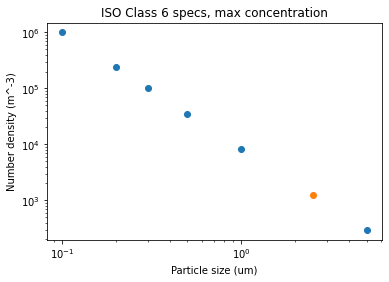

In [9]:
# N_ISO7_array = [352000,83200,2930]
# size_ISO7_array = [0.5,1.0,5.0]

# maximum concentration limits equal to and greater than 
# considered sizes in array of particle sizes (particles/m^3)
N_ISO6_array = [1e6,237000,102000,35200,8320,293]

# particle sizes
size_ISO6_array = [0.1,0.2,0.3,0.5,1.0,5.0]

# interpolate in log-log space
f = interpolate.interp1d(np.log10(size_ISO6_array), np.log10(N_ISO6_array), kind="linear")
xnew = [np.log10(2.5)]
ynew = f(xnew)   # use interpolation function returned by `interp1d`

# plot linear values, with log-log scaling
plt.scatter(size_ISO6_array,N_ISO6_array)
plt.scatter(np.power(10.,xnew),np.power(10.,ynew))
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Particle size (um)")
plt.ylabel("Number density (m^-3)")

'''
# flipped axes
plt.scatter(N_ISO6_array,size_ISO6_array)
plt.scatter(np.power(10.,ynew),np.power(10.,xnew))
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Particle size (um)")
plt.xlabel("Number density (m^-3)")
'''

plt.title("ISO Class 6 specs, max concentration")

plt.show()

In [8]:
print("Max PM2.5 value (m^(-3)):", np.power(10.,ynew)[0])

Max PM2.5 value (m^(-3)): 1238.085923221107


In [57]:
# plot precision

# abcissa
abcissa_densities = np.linspace(0,boundary_1to2) # (/m^3)

# step-like functions of precisions (keep everything in /m^3)
ordinate_precisions_PM05to25 = np.zeros(len(abcissa_densities))
ordinate_precisions_PM05to25[abcissa_densities < boundary_0to1] = prec_PM05to25_low_numb_perm3
ordinate_precisions_PM05to25[abcissa_densities > boundary_0to1] = prec_PM05to25_high_frac*abcissa_densities[
                                                                        abcissa_densities > boundary_0to1]

ordinate_precisions_PM4to10 = np.zeros(len(abcissa_densities))
ordinate_precisions_PM4to10[abcissa_densities < boundary_0to1] = prec_PM4to10_low_numb_perm3
ordinate_precisions_PM4to10[abcissa_densities > boundary_0to1] = prec_PM4to10_high_frac*abcissa_densities[
                                                                        abcissa_densities > boundary_0to1]

plt.clf()

f, (ax1) = plt.subplots(1, 1)

ax1.plot(abcissa_densities,ordinate_precisions_PM05to25,color="blue",
         linewidth=6,label="SPS30, PM0.5,PM1,PM2.5 stated precision")
ax1.plot(abcissa_densities,ordinate_precisions_PM4to10,color="red",
         linewidth=6,label="SPS30, PM4,PM10 stated precision (extrap.)")
ax1.set_ylabel("Precision ($\pm N $m$^{-3}$)")
ax1.set_xlabel("Number density (m$^{-3}$)")

ax1.axhline(y=1e6, linestyle="--", color="gray")
ax1.annotate("$\geq$0.1 um max density", (1e8,1e6), rotation=0)
ax1.axvline(x=1e6, linestyle="--", color="gray")
ax1.annotate("$\geq$0.1 um", (1e6,7e8), rotation=90)

ax1.axhline(y=237000, linestyle="--", color="gray")
ax1.annotate("$\geq$0.2 um max density", (1e8,237000), rotation=0)
ax1.axvline(x=237000, linestyle="--", color="gray")
ax1.annotate("$\geq$0.2 um", (237000,7e8), rotation=90)

ax1.axhline(y=102000, linestyle="--", color="gray")
ax1.annotate("$\geq$0.3 um max density", (1e8,102000), rotation=0)
ax1.axvline(x=102000, linestyle="--", color="gray")
ax1.annotate("$\geq$0.3 um", (102000,7e8), rotation=90)

ax1.axhline(y=35200, linestyle="--", color="gray")
ax1.annotate("$\geq$0.5 um max density", (1e8,35200), rotation=0)
ax1.axvline(x=35200, linestyle="--", color="gray")
ax1.annotate("$\geq$0.5 um", (35200,7e8), rotation=90)

ax1.axhline(y=8320, linestyle="--", color="gray")
ax1.annotate("$\geq$1.0 um max density", (1e8,8320), rotation=0)
ax1.axvline(x=8320, linestyle="--", color="gray")
ax1.annotate("$\geq$1.0 um", (8320,7e8), rotation=90)

ax1.axhline(y=1238, linestyle="--", color="gray")
ax1.annotate("$\geq$2.5 um max density\n(extrap)", (1e8,1238), rotation=0)
ax1.axvline(x=1238, linestyle="--", color="gray")
ax1.annotate("$\geq$2.5 um\n(extrap)", (1238,7e8), rotation=90)

ax1.axhline(y=293, linestyle="--", color="gray")
ax1.annotate("$\geq$5.0 um max density", (1e8,293), rotation=0)
ax1.axvline(x=293, linestyle="--", color="gray")
ax1.annotate("$\geq$5.0 um\nmax density", (293,7e8), rotation=90)

ax1.axhline(y=5e5, linewidth=6, color="orange", label="SPS30, Jayke's apparent precision (0.5 & 10 um)")

#ax1.set_ylim([0,5e2])
#ax1.set_xlim([1e2,1.1e6])

#ax1.legend(loc="upper right")
ax1.legend(loc="center right", bbox_to_anchor=(1.0,0.7))

ax1.set_xscale('log')
ax1.set_yscale('log')

plt.suptitle("ISO Class 6 (Class 1000) standard\nmaximum particle number densities")

#plt.tight_layout()
plt.show()